### Logistic Regression Model on HR Retention in the organization/company

There are multiple reasons why HR leaves the organization/company, some of the reasons can be salary,satisfaction level,company's culture,their working hours,department they are in,their boss sometimes and so many more, some of which are presented in the given dataset below.If we can predict the what can cause employess leave, we can work on them, retain the employees and increase their and company's performance.This project predict if employes leave or not based on certain features using Logistic Regression.

Data Source: https://www.kaggle.com/giripujar/hr-analytics

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#importing data
hr_informations=pd.read_csv('HR_data.csv')
hr_informations=hr_informations.sort_values(by=['satisfaction_level','last_evaluation'],ascending=True).reset_index(drop=True)
hr_informations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.09,0.62,6,294,4,0,1,0,accounting,low
1,0.09,0.62,6,294,4,0,1,0,accounting,low
2,0.09,0.62,6,294,4,0,1,0,accounting,low
3,0.09,0.77,5,275,4,0,1,0,product_mng,medium
4,0.09,0.77,6,290,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
14994,1.00,0.97,3,216,3,1,0,0,sales,low
14995,1.00,0.97,5,141,2,0,0,0,accounting,medium
14996,1.00,0.98,3,177,2,0,0,0,management,low
14997,1.00,0.99,4,184,4,0,0,0,support,low


In [91]:
hr_informations.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.09,0.62,6,294,4,0,1,0,accounting,low
1,0.09,0.62,6,294,4,0,1,0,accounting,low
2,0.09,0.62,6,294,4,0,1,0,accounting,low
3,0.09,0.77,5,275,4,0,1,0,product_mng,medium
4,0.09,0.77,6,290,4,0,1,0,technical,medium


In [92]:
hr_informations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [93]:
hr_informations.shape

(14999, 10)

In [94]:
hr_informations.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

No missing values present in the dataset

In [96]:
hr_informations.duplicated().sum()

3008

In [97]:
hr_informations=hr_informations.drop_duplicates() #Removing the duplicate entries.
hr_informations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.09,0.62,6,294,4,0,1,0,accounting,low
3,0.09,0.77,5,275,4,0,1,0,product_mng,medium
4,0.09,0.77,6,290,4,0,1,0,technical,medium
5,0.09,0.77,6,244,4,0,1,0,marketing,low
6,0.09,0.77,6,256,5,0,1,0,support,medium
...,...,...,...,...,...,...,...,...,...,...
14994,1.00,0.97,3,216,3,1,0,0,sales,low
14995,1.00,0.97,5,141,2,0,0,0,accounting,medium
14996,1.00,0.98,3,177,2,0,0,0,management,low
14997,1.00,0.99,4,184,4,0,0,0,support,low


In [98]:
hr_informations.satisfaction_level.value_counts()

0.74    214
0.10    203
0.73    201
0.50    200
0.84    199
       ... 
0.25     29
0.26     28
0.12     26
0.28     24
0.27     23
Name: satisfaction_level, Length: 92, dtype: int64

In [99]:
hr_informations.last_evaluation.value_counts()

0.55    281
0.50    269
0.51    264
0.57    258
0.54    252
       ... 
0.42     45
0.43     44
0.38     42
0.44     35
0.36     19
Name: last_evaluation, Length: 65, dtype: int64

### Feature Analysis

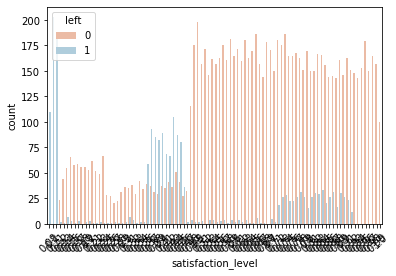

In [100]:
plt.figure()
sns.countplot(x='satisfaction_level', hue='left', data=hr_informations, palette='RdBu')
plt.xticks(rotation=45)
plt.show()


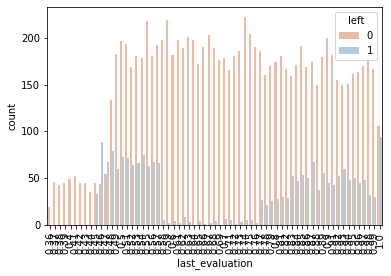

In [101]:
plt.figure()
sns.countplot(x='last_evaluation', hue='left', data=hr_informations, palette='RdBu')
plt.xticks(rotation=90)
plt.show()

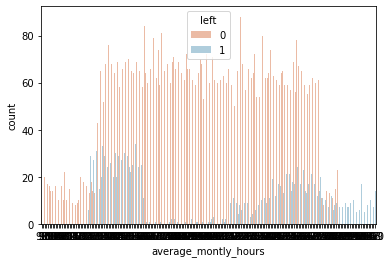

In [102]:
plt.figure()
sns.countplot(x='average_montly_hours', hue='left', data=hr_informations, palette='RdBu')
plt.show()

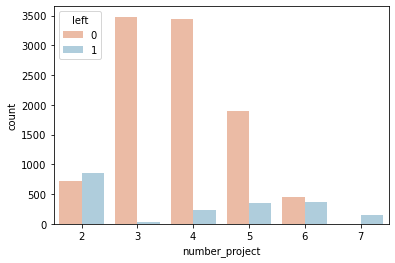

In [103]:
plt.figure()
sns.countplot(x='number_project', hue='left', data=hr_informations, palette='RdBu')
plt.show()

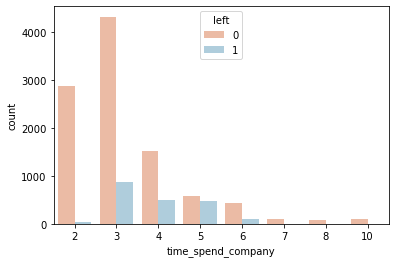

In [104]:
plt.figure()
sns.countplot(x='time_spend_company', hue='left', data=hr_informations, palette='RdBu')
plt.show()

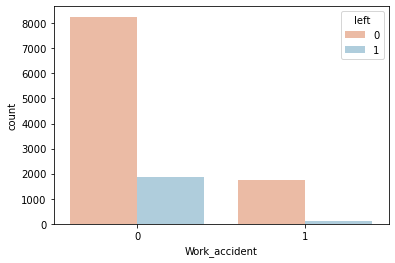

In [105]:
plt.figure()
sns.countplot(x='Work_accident', hue='left', data=hr_informations, palette='RdBu')
plt.show()

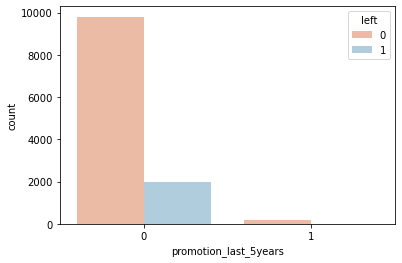

In [106]:
plt.figure()
sns.countplot(x='promotion_last_5years', hue='left', data=hr_informations, palette='RdBu')
plt.show()

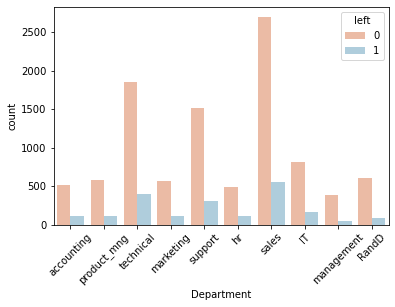

In [107]:
plt.figure()
sns.countplot(x='Department', hue='left', data=hr_informations, palette='RdBu')
plt.xticks(rotation=45)
plt.show()

### Conclusion 
From the Above visualization we can conclude that
Number projects,last_evaluation,Department,Work Accident do not have proper correlation with the employes retention and thus does not affect much on people leaving or staying the company thus we are going to discard them for building our model.

The dataframe after drawing inferences is as:

In [108]:
sub_hr_informations=hr_informations[['promotion_last_5years','time_spend_company','satisfaction_level','salary','average_montly_hours']]
sub_hr_informations

,promotion_last_5years,time_spend_company,satisfaction_level,salary,average_montly_hours
0,0,4,0.09,low,294
3,0,4,0.09,medium,275
4,0,4,0.09,medium,290
5,0,4,0.09,low,244
6,0,5,0.09,medium,256
...,...,...,...,...,...
14994,0,3,1.00,low,216
14995,0,2,1.00,medium,141
14996,0,2,1.00,low,177
14997,0,4,1.00,low,184


As salary column contains Non-Numeric data, we need to convert them to Numeric by creating dummy variable having binary data so that Scikit learn API can process them.

In [109]:
get_dummies_salary=pd.get_dummies(sub_hr_informations.salary)
get_dummies_salary

,high,low,medium
0,0,1,0
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
...,...,...,...
14994,0,1,0
14995,0,0,1
14996,0,1,0
14997,0,1,0


In [110]:
merged_data=pd.concat([sub_hr_informations,get_dummies_salary],axis=1)
merged_data

,promotion_last_5years,time_spend_company,satisfaction_level,salary,average_montly_hours,high,low,medium
0,0,4,0.09,low,294,0,1,0
3,0,4,0.09,medium,275,0,0,1
4,0,4,0.09,medium,290,0,0,1
5,0,4,0.09,low,244,0,1,0
6,0,5,0.09,medium,256,0,0,1
...,...,...,...,...,...,...,...,...
14994,0,3,1.00,low,216,0,1,0
14995,0,2,1.00,medium,141,0,0,1
14996,0,2,1.00,low,177,0,1,0
14997,0,4,1.00,low,184,0,1,0


In [111]:
merged_hr_data=merged_data.drop(['salary','medium'],axis=1)
merged_hr_data

,promotion_last_5years,time_spend_company,satisfaction_level,average_montly_hours,high,low
0,0,4,0.09,294,0,1
3,0,4,0.09,275,0,0
4,0,4,0.09,290,0,0
5,0,4,0.09,244,0,1
6,0,5,0.09,256,0,0
...,...,...,...,...,...,...
14994,0,3,1.00,216,0,1
14995,0,2,1.00,141,0,0
14996,0,2,1.00,177,0,1
14997,0,4,1.00,184,0,1


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X=merged_hr_data.values
y=hr_informations.left.values

In [114]:
X

array([[0.00e+00, 4.00e+00, 9.00e-02, 2.94e+02, 0.00e+00, 1.00e+00],
       [0.00e+00, 4.00e+00, 9.00e-02, 2.75e+02, 0.00e+00, 0.00e+00],
       [0.00e+00, 4.00e+00, 9.00e-02, 2.90e+02, 0.00e+00, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+00, 1.00e+00, 1.77e+02, 0.00e+00, 1.00e+00],
       [0.00e+00, 4.00e+00, 1.00e+00, 1.84e+02, 0.00e+00, 1.00e+00],
       [0.00e+00, 4.00e+00, 1.00e+00, 1.42e+02, 0.00e+00, 1.00e+00]])

In [117]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [119]:
X_train

array([[  0.  ,   2.  ,   0.84, 186.  ,   0.  ,   0.  ],
       [  0.  ,   3.  ,   0.65, 259.  ,   0.  ,   0.  ],
       [  0.  ,   4.  ,   0.93, 256.  ,   0.  ,   1.  ],
       ...,
       [  0.  ,   5.  ,   0.96, 128.  ,   0.  ,   1.  ],
       [  0.  ,   3.  ,   0.94, 187.  ,   0.  ,   1.  ],
       [  0.  ,   4.  ,   0.8 , 271.  ,   0.  ,   1.  ]])

In [120]:
X_test

array([[  0.  ,   6.  ,   0.66, 202.  ,   0.  ,   1.  ],
       [  1.  ,   6.  ,   0.95, 214.  ,   0.  ,   0.  ],
       [  0.  ,   4.  ,   0.96, 193.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   3.  ,   0.66, 177.  ,   0.  ,   0.  ],
       [  0.  ,   4.  ,   0.86, 232.  ,   0.  ,   1.  ],
       [  0.  ,   3.  ,   0.38, 130.  ,   0.  ,   1.  ]])

In [121]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
model=LogisticRegression()
type(model)

sklearn.linear_model._logistic.LogisticRegression

In [125]:
model.fit(X_train,y_train)

LogisticRegression()

In [126]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [130]:
#predict new data choosing a single row for single employee.
new_test_sample=X_test[[0]]
new_test_sample
model.predict(new_test_sample)

array([0], dtype=int64)

In [128]:
model.score(X_test,y_test)

0.8511879949979158